In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import sys
import pickle
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
import seaborn as sns

C:\Users\DHAIRYA\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
xdata = np.load('npy\s2adl3_x.npy')
ydata = np.load('npy\s2adl3_y.npy')

In [3]:
model = load_model('traincv_loco_gru.h5')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
results = model.predict(xdata)

In [5]:
predictions = np.argmax(results, axis=1)
truths=np.argmax(ydata,axis=1)
accuracy_score(truths,predictions)

0.6567543859649123

In [6]:
confusion_matrix(truths,predictions)

array([[10635,   728,     0,     0,    72],
       [ 1471,  4808,     0,     0,    38],
       [  597,     0,     0,     0,  7397],
       [    0,     0,     0,   909,     4],
       [  449,   917,     0,    66,  6109]], dtype=int64)

[Text(91.68,0.5,'Predicted Label'), Text(0.5,15,'True Label')]

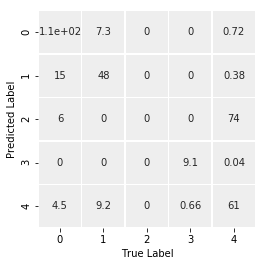

In [7]:
plot  = sns.heatmap(confusion_matrix(truths,predictions)/100,cmap=['#eeeeee'],annot=True,linewidth=0.5,cbar=0,square=True)
plot.set(xlabel='True Label', ylabel='Predicted Label')

In [8]:
f1_score(truths,predictions,average='weighted')

C:\Users\DHAIRYA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5813540372735186

In [9]:
recall_score(truths,predictions,average='weighted')

0.6567543859649123

In [10]:
precision_score(truths,predictions,average='weighted')

C:\Users\DHAIRYA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.531778895397338